In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.info(),train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass  

(None, None)

In [5]:
train.sample(20)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
432,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S
246,247,0,3,"Lindahl, Miss. Agda Thorilda Viktoria",female,25.0,0,0,347071,7.7750,NaN,S
694,695,0,1,"Weir, Col. John",male,60.0,0,0,113800,26.5500,NaN,S
458,459,1,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.5000,NaN,S
624,625,0,3,"Bowen, Mr. David John ""Dai""",male,21.0,0,0,54636,16.1000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
836,837,0,3,"Pasic, Mr. Jakob",male,21.0,0,0,315097,8.6625,NaN,S
203,204,0,3,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,NaN,C
562,563,0,2,"Norman, Mr. Robert Douglas",male,28.0,0,0,218629,13.5000,NaN,S
535,536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.2500,NaN,S


In [6]:
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [7]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()


PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [9]:
train['Embarked'].fillna('S',inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)
df=pd.concat([train,test],sort=True).reset_index(drop=True)
df.shape
df.head()


,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [10]:
df.corr(numeric_only=True)['Age'].abs()


Age            1.000000
Fare           0.178314
Parch          0.150917
PassengerId    0.028814
Pclass         0.408106
SibSp          0.243699
Survived       0.077221
Name: Age, dtype: float64

In [11]:
df_Age_mean=df.groupby(['Sex', 'Pclass']).median(numeric_only=True)['Age']
df_Age_mean

Sex     Pclass
female  1         36.0
        2         28.0
        3         22.0
male    1         42.0
        2         29.5
        3         25.0
Name: Age, dtype: float64

In [12]:
df['Age']=df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))


In [13]:
df.isnull().sum()

Age              0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64

In [14]:
df['Title']=df['Name'].str.split(", ",expand=True)[1].str.split(".",expand=True)[0]
df['Title'].value_counts()

Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [15]:
df['Title'] = df['Title'].replace(['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df['Title'].value_counts()

Title
Mr        757
Miss      264
Mrs       198
Master     61
Rare       29
Name: count, dtype: int64

In [16]:
df['Family_size']=df['SibSp'] + df['Parch'] + 1
df.sample(10)

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_size
804,27.0,S,6.9750,"Hedman, Mr. Oskar Arvid",0,805,3,male,0,1.0,347089,Mr,1
606,30.0,S,7.8958,"Karaic, Mr. Milan",0,607,3,male,0,0.0,349246,Mr,1
1145,32.5,S,9.5000,"Wenzel, Mr. Linhart",0,1146,3,male,0,NaN,345775,Mr,1
528,39.0,S,7.9250,"Salonen, Mr. Johan Werner",0,529,3,male,0,0.0,3101296,Mr,1
720,6.0,S,33.0000,"Harper, Miss. Annie Jessie ""Nina""",1,721,2,female,0,1.0,248727,Miss,2
1068,54.0,C,55.4417,"Stengel, Mr. Charles Emil Henry",0,1069,1,male,1,NaN,11778,Mr,2
306,36.0,C,110.8833,"Fleming, Miss. Margaret",0,307,1,female,0,1.0,17421,Miss,1
526,50.0,S,10.5000,"Ridsdale, Miss. Lucy",0,527,2,female,0,1.0,W./C. 14258,Miss,1
557,42.0,C,227.5250,"Robbins, Mr. Victor",0,558,1,male,0,0.0,PC 17757,Mr,1
641,24.0,C,69.3000,"Sagesser, Mlle. Emma",0,642,1,female,0,1.0,PC 17477,Miss,1


In [17]:
df.drop(columns=['Name','Parch','SibSp','Ticket'],inplace=True)

In [18]:
df.sample(10)

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Title,Family_size
857,51.0,S,26.5500,858,1,male,1.0,Mr,1
619,26.0,S,10.5000,620,2,male,0.0,Mr,1
391,21.0,S,7.7958,392,3,male,1.0,Mr,1
76,25.0,S,7.8958,77,3,male,0.0,Mr,1
22,15.0,Q,8.0292,23,3,female,1.0,Miss,1
417,18.0,S,13.0000,418,2,female,1.0,Miss,3
1217,12.0,S,39.0000,1218,2,female,NaN,Miss,4
1032,33.0,S,151.5500,1033,1,female,NaN,Miss,1
384,25.0,S,7.8958,385,3,male,0.0,Mr,1
71,16.0,S,46.9000,72,3,female,0.0,Miss,8


In [19]:
def family_size(number):
    if number==1:
        return "Alone"
    elif number>1 and number <5:
        return "Small"
    else:
        return "Large"
df['Family_size']=df['Family_size'].apply(family_size)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1309 non-null   float64
 1   Embarked     1309 non-null   object 
 2   Fare         1309 non-null   float64
 3   PassengerId  1309 non-null   int64  
 4   Pclass       1309 non-null   int64  
 5   Sex          1309 non-null   object 
 6   Survived     891 non-null    float64
 7   Title        1309 non-null   object 
 8   Family_size  1309 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 92.2+ KB


In [20]:
df['Age'] = df['Age'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1309 non-null   int64  
 1   Embarked     1309 non-null   object 
 2   Fare         1309 non-null   float64
 3   PassengerId  1309 non-null   int64  
 4   Pclass       1309 non-null   int64  
 5   Sex          1309 non-null   object 
 6   Survived     891 non-null    float64
 7   Title        1309 non-null   object 
 8   Family_size  1309 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 92.2+ KB


In [21]:
col=['Embarked','Pclass','Sex','Title','Family_size']
for i in col:
    print('Survival Correlation by:', i)
    df2=df.groupby(i)['Survived'].mean().reset_index()
    print(df2)
    print('-'*10, '\n')

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826
---------- 

Survival Correlation by: Family_size
  Family_size  Survived
0       Alone  0.303538
1       Large  0.161290
2       Small  0.578767
---------- 



In [22]:
df.head()

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Title,Family_size
0,22,S,7.2500,1,3,male,0.0,Mr,Small
1,38,C,71.2833,2,1,female,1.0,Mrs,Small
2,26,S,7.9250,3,3,female,1.0,Miss,Alone
3,35,S,53.1000,4,1,female,1.0,Mrs,Small
4,35,S,8.0500,5,3,male,0.0,Mr,Alone


Feature engineering

In [23]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn import ensemble
from sklearn import gaussian_process
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import svm
from sklearn import tree
from sklearn import discriminant_analysis
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
df.head()

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Title,Family_size
0,22,S,7.2500,1,3,male,0.0,Mr,Small
1,38,C,71.2833,2,1,female,1.0,Mrs,Small
2,26,S,7.9250,3,3,female,1.0,Miss,Alone
3,35,S,53.1000,4,1,female,1.0,Mrs,Small
4,35,S,8.0500,5,3,male,0.0,Mr,Alone


In [24]:
train = df.loc[:890]
test = df.loc[891:]

In [25]:
test.head()

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Title,Family_size
891,34,Q,7.8292,892,3,male,NaN,Mr,Alone
892,47,S,7.0000,893,3,female,NaN,Mrs,Small
893,62,Q,9.6875,894,2,male,NaN,Mr,Alone
894,27,S,8.6625,895,3,male,NaN,Mr,Alone
895,22,S,12.2875,896,3,female,NaN,Mrs,Small


In [26]:
train.head()

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Title,Family_size
0,22,S,7.2500,1,3,male,0.0,Mr,Small
1,38,C,71.2833,2,1,female,1.0,Mrs,Small
2,26,S,7.9250,3,3,female,1.0,Miss,Alone
3,35,S,53.1000,4,1,female,1.0,Mrs,Small
4,35,S,8.0500,5,3,male,0.0,Mr,Alone


In [27]:
test.drop(columns=['Survived'],inplace=True)
train['Survived'] = train['Survived'].astype('int64')
train.head()


,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Title,Family_size
0,22,S,7.2500,1,3,male,0,Mr,Small
1,38,C,71.2833,2,1,female,1,Mrs,Small
2,26,S,7.9250,3,3,female,1,Miss,Alone
3,35,S,53.1000,4,1,female,1,Mrs,Small
4,35,S,8.0500,5,3,male,0,Mr,Alone


In [28]:
train.shape,test.shape


((891, 9), (418, 8))

In [29]:
train = train.drop("PassengerId", axis=1)



In [30]:
y_train = train["Survived"]
X_train = train.drop("Survived", axis=1)

X_train.head()

,Age,Embarked,Fare,Pclass,Sex,Title,Family_size
0,22,S,7.2500,3,male,Mr,Small
1,38,C,71.2833,1,female,Mrs,Small
2,26,S,7.9250,3,female,Miss,Alone
3,35,S,53.1000,1,female,Mrs,Small
4,35,S,8.0500,3,male,Mr,Alone


In [31]:
X_train.shape,y_train.shape

((891, 7), (891,))

In [32]:
num_cat_tranformation=ColumnTransformer([
                                    ('scaling',MinMaxScaler(),[0,2]),
                                    ('onehotencolding1',OneHotEncoder(),[1,3]),
                                    ('ordinal',OrdinalEncoder(),[4]),
                                    ('onehotencolding2',OneHotEncoder(),[5,6])
                                    ],remainder='passthrough')

In [33]:
bins=ColumnTransformer([
                        ('Kbins',KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile'),[0,2]),
                        ],remainder='passthrough')

In [34]:
from sklearn import set_config
set_config(display='diagram')

In [35]:
X_train.head()

,Age,Embarked,Fare,Pclass,Sex,Title,Family_size
0,22,S,7.2500,3,male,Mr,Small
1,38,C,71.2833,1,female,Mrs,Small
2,26,S,7.9250,3,female,Miss,Alone
3,35,S,53.1000,1,female,Mrs,Small
4,35,S,8.0500,3,male,Mr,Alone


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_train,y_train,test_size=0.2)

In [37]:
def create_pipeline(algo):
    return Pipeline([
        ('num_cat_transformation', num_cat_tranformation),
        ('bins', bins),
        ('classifier', algo)
    ])

In [38]:
algorithms=[
    ensemble.RandomForestClassifier(),


    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
]

In [39]:
print(X_train.columns)


Index(['Age', 'Embarked', 'Fare', 'Pclass', 'Sex', 'Title', 'Family_size'], dtype='object')


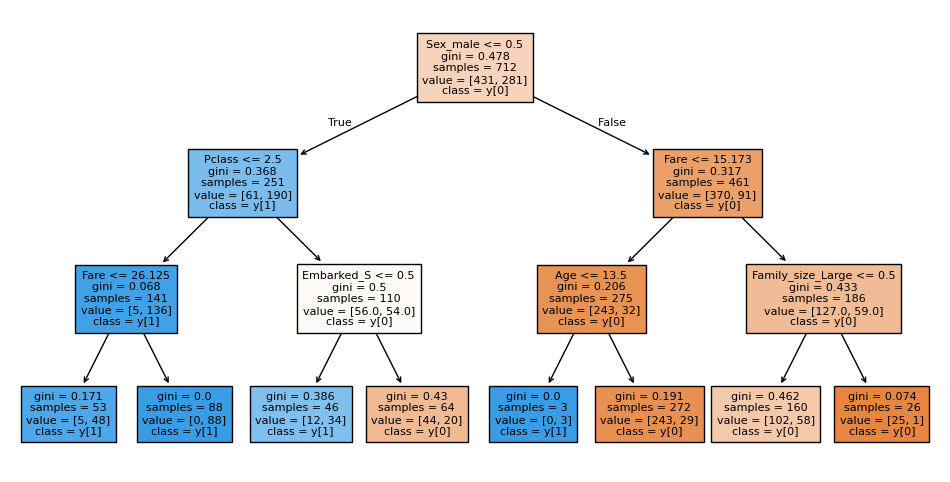

In [ ]:
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.preprocessing import OneHotEncoder
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn import tree

    # Columns that need encoding
    categorical_cols = ['Embarked', 'Sex', 'Title', 'Family_size']

    # One-Hot Encoding
    X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)

    # Train a single Decision Tree with a limited depth
    dt_model = DecisionTreeClassifier(random_state=42, max_depth=3)  # Adjust depth as needed
    dt_model.fit(X_train, y_train)

    # Visualize the decision tree
    plt.figure(figsize=(12, 6))  # Adjust figure size for readability
    tree.plot_tree(dt_model, filled=True, feature_names=X_train.columns, class_names=True, fontsize=8)  # Reduce font size
    plt.show()


In [42]:
# Print accuracy
accuracy = dt_model.score(X_train, y_train)
print(f"Training Accuracy: {accuracy:.4f}")


Training Accuracy: 0.8244


In [41]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd

# Columns that need encoding
categorical_cols = ['Embarked', 'Sex', 'Title', 'Family_size']

# One-Hot Encoding
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
rf_model = ensemble.RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)



KeyError: "None of [Index(['Embarked', 'Sex', 'Title', 'Family_size'], dtype='object')] are in the [columns]"

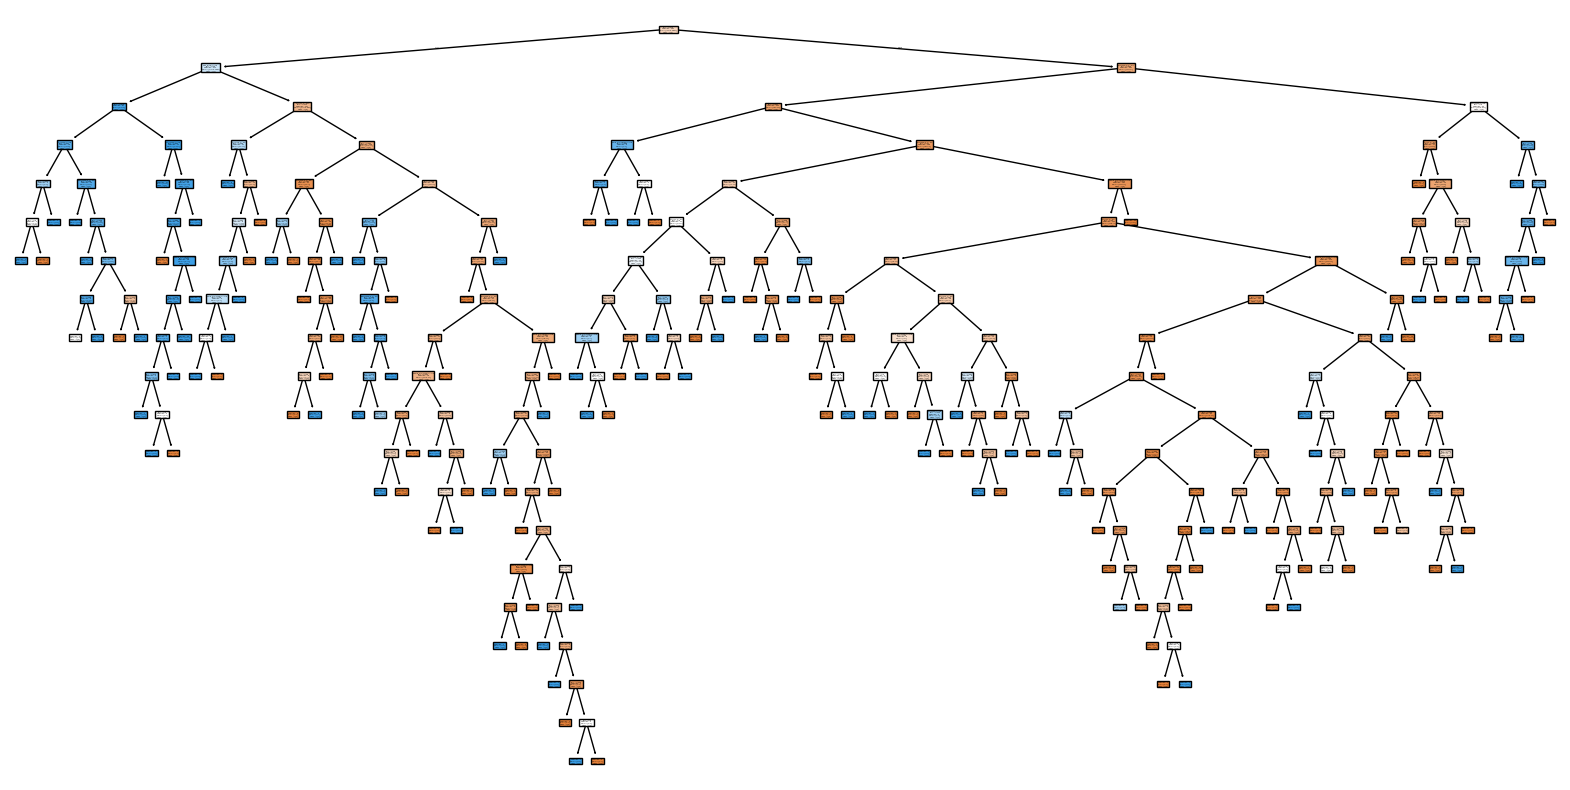

In [ ]:
# Train the Random Forest
rf_model = ensemble.RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Extract one tree from the forest
plt.figure(figsize=(20,10))
tree.plot_tree(rf_model.estimators_[0], filled=True, feature_names=X_train.columns, class_names=True)
plt.show()


In [ ]:
model_names = []
CV_Accuracy=[]
for algo in algorithms:
    pipeline = create_pipeline(algo)
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    model_names.append(algo.__class__.__name__)
    CV_Accuracy.append(scores.mean())
    
#     print(f'Model: {algo.__class__.__name__}, CV Accuracy: {scores.mean()}')
#     print('\n')

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\kyabr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\kyabr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kyabr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py", line 469, in fit
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kyabr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py", line 406, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kyabr\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kyabr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py", line 1310, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kyabr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_set_output.py", line 316, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kyabr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kyabr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\compose\_column_transformer.py", line 976, in fit_transform
    result = self._call_func_on_transformers(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kyabr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\compose\_column_transformer.py", line 885, in _call_func_on_transformers
    return Parallel(n_jobs=self.n_jobs)(jobs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kyabr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\parallel.py", line 74, in __call__
    return super().__call__(iterable_with_config)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kyabr\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\parallel.py", line 1918, in __call__
    return output if self.return_generator else list(output)
                                                ^^^^^^^^^^^^
  File "c:\Users\kyabr\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\parallel.py", line 1847, in _get_sequential_output
    res = func(*args, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kyabr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\parallel.py", line 136, in __call__
    return self.function(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kyabr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py", line 1310, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kyabr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_set_output.py", line 316, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kyabr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1101, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kyabr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kyabr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py", line 226, in fit
    X = self._validate_data(X, dtype="numeric")
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kyabr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 633, in _validate_data
    out = check_array(X, input_name="X", **check_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kyabr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 971, in check_array
    array = _ensure_sparse_format(
            ^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kyabr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 595, in _ensure_sparse_format
    raise TypeError(
TypeError: Sparse data was passed for X, but dense data is required. Use '.toarray()' to convert to a dense numpy array.


In [ ]:
model_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': CV_Accuracy})

In [ ]:
model_df.sort_values(by='Accuracy', ascending=False, inplace=True)


In [ ]:
model_df


,Model,Accuracy
0,RandomForestClassifier,0.809042
1,DecisionTreeClassifier,0.786506
2,ExtraTreeClassifier,0.780961


In [ ]:
print(X_train.dtypes)


Age              int64
Embarked        object
Fare           float64
Pclass           int64
Sex             object
Title           object
Family_size     object
dtype: object


In [ ]:
# Train the Random Forest
rf_model = ensemble.RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Extract one tree from the forest
plt.figure(figsize=(20,10))
tree.plot_tree(rf_model.estimators_[0], filled=True, feature_names=X_train.columns, class_names=True)
plt.show()


ValueError: could not convert string to float: 'S'

In [ ]:
from sklearn.ensemble import RandomForestClassifier

algo1 = RandomForestClassifier(criterion='gini',
                               n_estimators=1750,
                               max_depth=7,
                               min_samples_split=6,
                               min_samples_leaf=6,
                               max_features=None,  # Consider all features
                               oob_score=True,
                               random_state=42,
                               n_jobs=-1,
                               verbose=1)

# Now you can fit the model
from sklearn.preprocessing import LabelEncoder

# Assuming X_train contains categorical columns with labels
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column in X_train
X_train_encoded = X_train.apply(label_encoder.fit_transform)

# Now fit the model
algo1.fit(X_train_encoded, y_train)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    2.8s finished


RandomForestClassifier(max_depth=7, max_features=None, min_samples_leaf=6,
                       min_samples_split=6, n_estimators=1750, n_jobs=-1,
                       oob_score=True, random_state=42, verbose=1)

In [ ]:
pipe1=Pipeline([
        ('num_cat_transformation', num_cat_tranformation),
        ('bins', bins),
        ('classifier', algo1)
    ])

In [ ]:
pipe1.fit(X_train,y_train)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    4.0s finished


Pipeline(steps=[('num_cat_transformation',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling', MinMaxScaler(),
                                                  [0, 2]),
                                                 ('onehotencolding1',
                                                  OneHotEncoder(), [1, 3]),
                                                 ('ordinal', OrdinalEncoder(),
                                                  [4]),
                                                 ('onehotencolding2',
                                                  OneHotEncoder(), [5, 6])])),
                ('bins',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Kbins',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=15),
                                                  [0, 2])])),
                ('classifier',
                 RandomForestClassifier(max_depth=7, max_features=None,
                                        min_samples_leaf=6, min_samples_split=6,
                                        n_estimators=1750, n_jobs=-1,
                                        oob_score=True, random_state=42,
                                        verbose=1))])

In [ ]:
y_pred = pipe1.predict(X_train)
accuracy_score(y_test,y_pred)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1750 out of 1750 | elapsed:    0.3s finished


NameError: name 'y_test' is not defined

In [ ]:
test = test.drop("PassengerId", axis=1)
test.head()

,Age,Embarked,Fare,Pclass,Sex,Title,Family_size
891,34,Q,7.8292,3,male,Mr,Alone
892,47,S,7.0000,3,female,Mrs,Small
893,62,Q,9.6875,2,male,Mr,Alone
894,27,S,8.6625,3,male,Mr,Alone
895,22,S,12.2875,3,female,Mrs,Small


In [ ]:
predictions = pipe1.predict(test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1750 out of 1750 | elapsed:    0.3s finished


In [ ]:
print(f"Number of samples in test: {len(test)}")
print(f"Number of samples in y_test: {len(y_test)}")

Number of samples in test: 418
Number of samples in y_test: 179


In [ ]:
from sklearn.metrics import accuracy_score
y_test = y_test
accuracy = accuracy_score(y_test, predictions)


ValueError: Found input variables with inconsistent numbers of samples: [179, 418]